Section 1: Setup and Data Loading

In [1]:
"""
Global Footprint Network Data Explorer Notebook
==============================================
This notebook provides interactive visualization and exploration of the 
transformed Global Footprint Network data.
"""
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Add the parent directory to import the utils
parent_dir = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

# Import the transformer
from utils.data_transformer_core import FootprintCoreTransformer

# Initialize the transformer and load data
transformer = FootprintCoreTransformer()
all_data = transformer.run_all_core_transformations()

# Extract each dataset into variables
countries = all_data['dim_countries']
years = all_data['dim_years']
record_types = all_data['dim_record_types']
measures = all_data['fact_ecological_measures']
ecological_balance = all_data['indicator_ecological_balance']
footprint_composition = all_data['indicator_footprint_composition']
time_series_changes = all_data['indicator_time_series_changes']
region_aggs = all_data.get('region_aggregations', pd.DataFrame())
income_aggs = all_data.get('income_aggregations', pd.DataFrame())
weighted_aggs = all_data.get('weighted_aggregations', pd.DataFrame())

print(f"Data loaded successfully! {len(all_data)} datasets available.")

Data loaded successfully! 10 datasets available.


Section 2: Dataset Overview

In [2]:
# Function to display dataset overview
def display_dataset_overview(name, df):
    print(f"\n=== {name} ===")
    print(f"Shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
    display(df.head(3))
    print("-" * 80)

# Display basic information about each dataset
for name, df in all_data.items():
    if isinstance(df, pd.DataFrame) and not df.empty:
        display_dataset_overview(name, df)


=== dim_countries ===
Shape: (271, 9)
Columns: ['score', 'short_name', 'country_code', 'country_name', 'iso_a2', 'processed_at', 'region', 'income_group', 'transformed_at']


,score,short_name,country_code,country_name,iso_a2,processed_at,region,income_group,transformed_at
0,3A,Armenia,1,Armenia,AM,2025-07-05 14:41:02.536922,Unknown,Unknown,2025-07-05 14:41:02.584818
1,3A,Afghanistan,2,Afghanistan,AF,2025-07-05 14:41:02.536922,Unknown,Unknown,2025-07-05 14:41:02.584818
2,3A,Albania,3,Albania,AL,2025-07-05 14:41:02.536922,Unknown,Unknown,2025-07-05 14:41:02.584818


--------------------------------------------------------------------------------

=== dim_years ===
Shape: (64, 6)
Columns: ['year', 'processed_at', 'decade', 'start_date', 'end_date', 'transformed_at']


,year,processed_at,decade,start_date,end_date,transformed_at
0,2024,2025-07-05 14:41:02.589467,2020,2024-01-01,2024-12-31,2025-07-05 14:41:02.594062
1,2023,2025-07-05 14:41:02.589467,2020,2023-01-01,2023-12-31,2025-07-05 14:41:02.594062
2,2022,2025-07-05 14:41:02.589467,2020,2022-01-01,2022-12-31,2025-07-05 14:41:02.594062


--------------------------------------------------------------------------------

=== dim_record_types ===
Shape: (7, 7)
Columns: ['name', 'note', 'code', 'record', 'processed_at', 'category', 'transformed_at']


,name,note,code,record,processed_at,category,transformed_at
0,Biocapacity per person,Biocapacity divided by population in global he...,BCpc,BiocapPerCap,2025-07-05 14:41:02.595056,Biocapacity,2025-07-05 14:41:02.597026
1,Biocapacity,Total biocapacity in global hectares (gha),BCtot,BiocapTotGHA,2025-07-05 14:41:02.595056,Other,2025-07-05 14:41:02.597026
2,Ecological Footprint per person,Ecological Footprint of consumption in global ...,EFCpc,EFConsPerCap,2025-07-05 14:41:02.595056,Other,2025-07-05 14:41:02.597026


--------------------------------------------------------------------------------

=== fact_ecological_measures ===
Shape: (3254, 16)
Columns: ['year', 'country_code', 'country_name_orig', 'short_name_orig', 'iso_a2_orig', 'record', 'crop_land', 'grazing_land', 'forest_land', 'fishing_ground', 'builtup_land', 'carbon', 'value', 'score', 'processed_at', 'transformed_at']


,year,country_code,country_name_orig,short_name_orig,iso_a2_orig,record,crop_land,grazing_land,forest_land,fishing_ground,builtup_land,carbon,value,score,processed_at,transformed_at
0,2022,1,Armenia,Armenia,AM,AreaPerCap,0.181164,4.211878e-01,0.118059,0.045676,0.028404,0.0,7.944907e-01,3A,2025-07-05 14:41:02.647178,2025-07-05 14:41:02.655417
1,2022,1,Armenia,Armenia,AM,AreaTotHA,503720.000000,1.171100e+06,328260.000000,127000.000000,78977.600098,0.0,2.209058e+06,3A,2025-07-05 14:41:02.647178,2025-07-05 14:41:02.655417
2,2022,1,Armenia,Armenia,AM,BiocapPerCap,0.405770,2.785527e-01,0.100977,0.016602,0.026953,0.0,8.288541e-01,3A,2025-07-05 14:41:02.647178,2025-07-05 14:41:02.655417


--------------------------------------------------------------------------------

=== indicator_ecological_balance ===
Shape: (188, 11)
Columns: ['country_code', 'year', 'biocapacity', 'footprint', 'ecological_balance', 'ecological_ratio', 'is_deficit', 'country_name', 'region', 'income_group', 'transformed_at']


,country_code,year,biocapacity,footprint,ecological_balance,ecological_ratio,is_deficit,country_name,region,income_group,transformed_at
0,1,2022,0.828854,2.625351,-1.796497,0.315712,True,Armenia,Unknown,Unknown,2025-07-05 14:41:02.663969
1,10,2022,12.251614,7.307172,4.944441,1.676656,False,Australia,Unknown,Unknown,2025-07-05 14:41:02.663969
2,100,2022,0.329423,1.106209,-0.776786,0.297795,True,India,Unknown,Unknown,2025-07-05 14:41:02.663969


--------------------------------------------------------------------------------

=== indicator_footprint_composition ===
Shape: (187, 23)
Columns: ['year', 'country_code', 'country_name_orig', 'short_name_orig', 'iso_a2_orig', 'record', 'crop_land', 'grazing_land', 'forest_land', 'fishing_ground', 'builtup_land', 'carbon', 'value', 'score', 'processed_at', 'transformed_at', 'crop_land_pct', 'grazing_land_pct', 'forest_land_pct', 'fishing_ground_pct', 'builtup_land_pct', 'carbon_pct', 'carbon_dependency']


,year,country_code,country_name_orig,short_name_orig,iso_a2_orig,record,crop_land,grazing_land,forest_land,fishing_ground,...,score,processed_at,transformed_at,crop_land_pct,grazing_land_pct,forest_land_pct,fishing_ground_pct,builtup_land_pct,carbon_pct,carbon_dependency
5,2022,1,Armenia,Armenia,AM,EFConsPerCap,0.692195,0.242718,0.201289,0.000502,...,3A,2025-07-05 14:41:02.647178,2025-07-05 14:41:02.666736,26.365826,9.245155,7.667132,0.019116,1.026641,55.676129,55.676129
22,2022,2,Afghanistan,Afghanistan,AF,EFConsPerCap,0.447543,0.146037,0.054578,0.000431,...,3A,2025-07-05 14:41:02.647178,2025-07-05 14:41:02.666736,59.607958,19.450545,7.269195,0.057368,4.060500,9.554434,9.554434
39,2022,3,Albania,Albania,AL,EFConsPerCap,0.772176,0.279455,0.187756,0.059034,...,3A,2025-07-05 14:41:02.647178,2025-07-05 14:41:02.666736,35.472798,12.837795,8.625282,2.711949,3.049723,37.302454,37.302454


--------------------------------------------------------------------------------

=== indicator_time_series_changes ===
Shape: (5364, 5)
Columns: ['country_code', 'record', 'metric', 'value', 'transformed_at']


,country_code,record,metric,value,transformed_at
0,1,BiocapPerCap,2020,NaN,2025-07-05 14:41:02.676377
1,1,EFConsPerCap,2020,NaN,2025-07-05 14:41:02.676377
2,1,Population,2020,NaN,2025-07-05 14:41:02.676377


--------------------------------------------------------------------------------

=== region_aggregations ===
Shape: (63, 10)
Columns: ['region', 'year', 'record', 'value_mean', 'value_median', 'value_std', 'value_min', 'value_max', 'value_count', 'transformed_at']


,region,year,record,value_mean,value_median,value_std,value_min,value_max,value_count,transformed_at
0,Africa,2020,BiocapPerCap,NaN,NaN,NaN,NaN,NaN,0,2025-07-05 14:41:02.694067
1,Africa,2020,EFConsPerCap,NaN,NaN,NaN,NaN,NaN,0,2025-07-05 14:41:02.694067
2,Africa,2020,Population,NaN,NaN,NaN,NaN,NaN,0,2025-07-05 14:41:02.694067


--------------------------------------------------------------------------------

=== income_aggregations ===
Shape: (45, 10)
Columns: ['income_group', 'year', 'record', 'value_mean', 'value_median', 'value_std', 'value_min', 'value_max', 'value_count', 'transformed_at']


,income_group,year,record,value_mean,value_median,value_std,value_min,value_max,value_count,transformed_at
0,High Income,2020,BiocapPerCap,NaN,NaN,NaN,NaN,NaN,0,2025-07-05 14:41:02.694159
1,High Income,2020,EFConsPerCap,NaN,NaN,NaN,NaN,NaN,0,2025-07-05 14:41:02.694159
2,High Income,2020,Population,NaN,NaN,NaN,NaN,NaN,0,2025-07-05 14:41:02.694159


--------------------------------------------------------------------------------

=== weighted_aggregations ===
Shape: (42, 7)
Columns: ['region', 'year', 'record', 'weighted_value', 'population', 'population_weighted_avg', 'transformed_at']


,region,year,record,weighted_value,population,population_weighted_avg,transformed_at
0,Africa,2020,BiocapPerCap,0.000000e+00,0.0,NaN,2025-07-05 14:41:02.694227
1,Africa,2020,EFConsPerCap,0.000000e+00,0.0,NaN,2025-07-05 14:41:02.694227
2,Africa,2022,BiocapPerCap,1.326939e+08,243266028.0,0.545468,2025-07-05 14:41:02.694227


--------------------------------------------------------------------------------


Section 3: Ecological Balance Analysis

Top 10 Countries with Largest Ecological Reserve:


,country_name,region,income_group,biocapacity,footprint,ecological_balance
173,Gabon,Unknown,Unknown,17.249200,2.261338,14.987862
85,Bolivia,Unknown,Unknown,13.493904,2.795655,10.698250
153,Congo,Unknown,Unknown,7.925198,1.196280,6.728918
144,Canada,Unknown,Unknown,14.445839,8.360311,6.085527
70,Paraguay,Unknown,Unknown,8.171836,2.183268,5.988568
107,Brazil,Unknown,Unknown,8.139713,2.414074,5.725639
168,Finland,Unknown,Unknown,12.043969,6.442348,5.601621
147,Central African Republic,Unknown,Unknown,6.807874,1.415432,5.392442
1,Australia,Unknown,Unknown,12.251614,7.307172,4.944441
53,Mongolia,Unknown,Unknown,13.478527,8.757137,4.721390



Top 10 Countries with Largest Ecological Deficit:


,country_name,region,income_group,biocapacity,footprint,ecological_balance
78,Qatar,Unknown,Unknown,0.955901,14.981430,-14.025530
133,Luxembourg,Unknown,Unknown,1.318677,12.755715,-11.437038
95,Singapore,Unknown,Unknown,0.031059,10.557671,-10.526612
44,Bahrain,Unknown,Unknown,0.487042,7.722257,-7.235215
35,Kuwait,Unknown,Unknown,0.519061,7.548999,-7.029938
132,Belgium,Unknown,Unknown,0.994228,5.982782,-4.988554
34,"Korea, Republic of",Asia,Unknown,0.625882,5.594556,-4.968674
176,Antigua and Barbuda,Unknown,Unknown,0.900478,5.704565,-4.804087
25,Israel,Unknown,Unknown,0.246288,5.045428,-4.799140
48,Malta,Unknown,Unknown,0.426087,5.064298,-4.638211


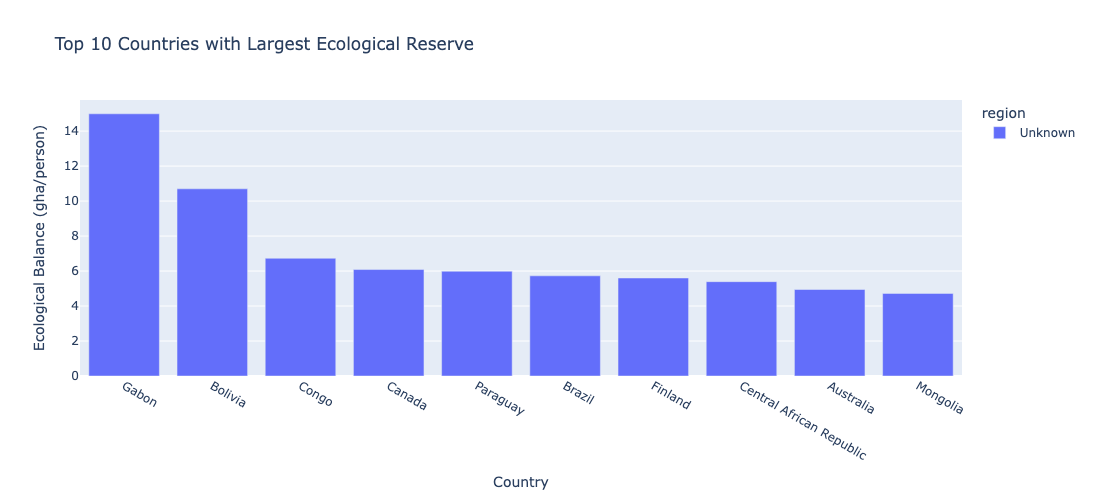

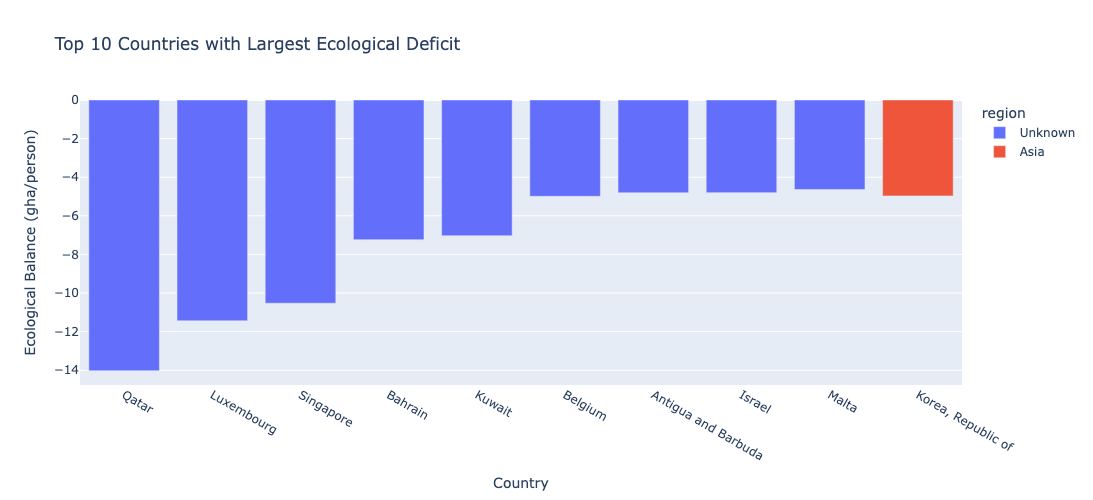

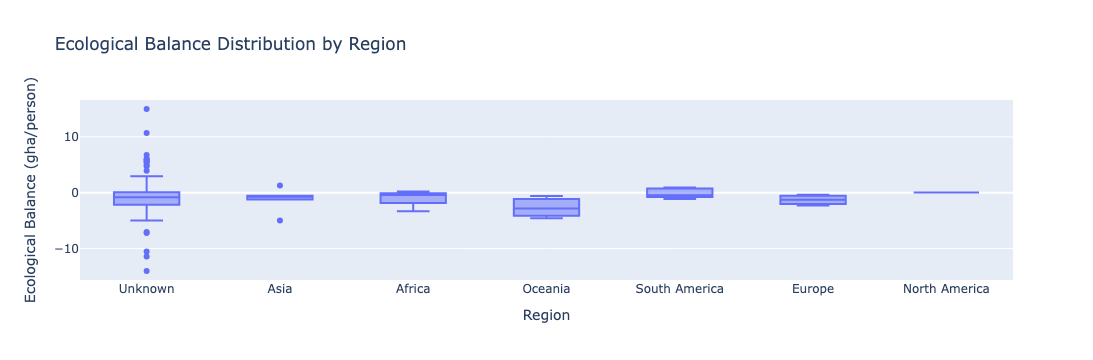

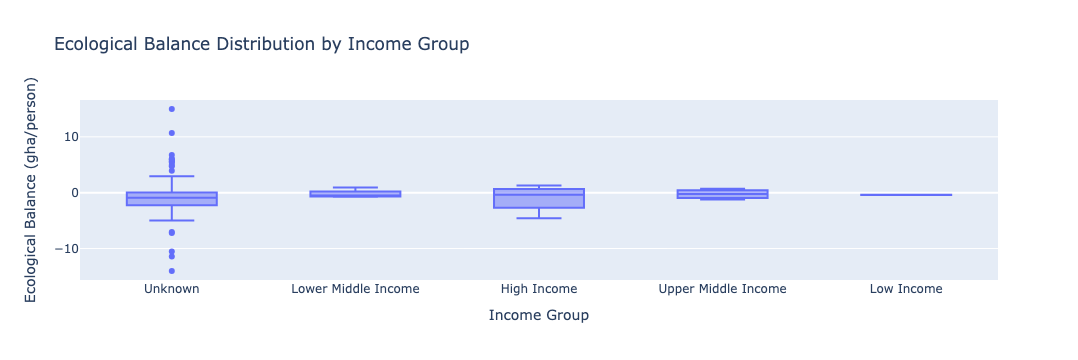

In [3]:
# Ecological Balance Analysis
print("Top 10 Countries with Largest Ecological Reserve:")
top_reserve = ecological_balance.sort_values('ecological_balance', ascending=False).head(10)
display(top_reserve[['country_name', 'region', 'income_group', 'biocapacity', 'footprint', 'ecological_balance']])

print("\nTop 10 Countries with Largest Ecological Deficit:")
top_deficit = ecological_balance.sort_values('ecological_balance').head(10)
display(top_deficit[['country_name', 'region', 'income_group', 'biocapacity', 'footprint', 'ecological_balance']])

# Create interactive bar chart with Plotly
fig = px.bar(
    top_reserve, 
    x='country_name', 
    y='ecological_balance',
    color='region',
    title='Top 10 Countries with Largest Ecological Reserve',
    labels={'country_name': 'Country', 'ecological_balance': 'Ecological Balance (gha/person)'},
    hover_data=['biocapacity', 'footprint']
)
fig.update_layout(height=500)
fig.show()

fig = px.bar(
    top_deficit, 
    x='country_name', 
    y='ecological_balance',
    color='region',
    title='Top 10 Countries with Largest Ecological Deficit',
    labels={'country_name': 'Country', 'ecological_balance': 'Ecological Balance (gha/person)'},
    hover_data=['biocapacity', 'footprint']
)
fig.update_layout(height=500)
fig.show()

# Boxplot of ecological balance by region
fig = px.box(
    ecological_balance, 
    x='region', 
    y='ecological_balance',
    title='Ecological Balance Distribution by Region',
    labels={'region': 'Region', 'ecological_balance': 'Ecological Balance (gha/person)'}
)
fig.show()

# Boxplot of ecological balance by income group
fig = px.box(
    ecological_balance, 
    x='income_group', 
    y='ecological_balance',
    title='Ecological Balance Distribution by Income Group',
    labels={'income_group': 'Income Group', 'ecological_balance': 'Ecological Balance (gha/person)'}
)
fig.show()